In [ ]:
from google.colab import files
uploaded = files.upload()

# Objective of the task is to predict the Profit of the state based on the other factors.

In [4]:
# Your code to import numpy
import numpy as np
# Your code to import pandas
import pandas as pd
# Your code to import matplpotlib.pyplot
import matplotlib.pyplot as plt

In [5]:
# Your code to read file
dataset = pd.read_csv("50_Startups.csv")
# Your code to print sample data
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Separate the independednt and Dependent variables.
# Profit is the dependedent variable

## What is the role of the axis and inplace in following code?

In [6]:
y = np.asarray(dataset['Profit'].values.tolist())

dataset.drop(["Profit"], axis = 1, inplace = True)

# We will convert  Categorical Variable values "State" to numbers with the One Hot Encoding Technique

# Initially, we will counts value that the feature "State" can take.

# Remember .value_counts() function

In [7]:
dataset.iloc[:,3].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

# Replacing the three states by the numbers 1, 2, 3.
# This is also called as the LabelEncoding

In [8]:
dataset.replace(to_replace=["California","New York", "Florida"], value=[1,2,3])

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,1
2,153441.51,101145.55,407934.54,3
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,3
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,1
7,130298.13,145530.06,323876.68,3
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,1


# We will create 3 more columns for the three states.

In [9]:
dataset["California"] = dataset.iloc[:, 3]
dataset["New York"] = dataset.iloc[:,3]
dataset["Florida"] = dataset.iloc[:,3]

# Check how the dataset looks now

In [10]:
# Your code to print few samples of dataset.
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,California,New York,Florida
0,165349.20,136897.80,471784.10,New York,New York,New York,New York
1,162597.70,151377.59,443898.53,California,California,California,California
2,153441.51,101145.55,407934.54,Florida,Florida,Florida,Florida
3,144372.41,118671.85,383199.62,New York,New York,New York,New York
4,142107.34,91391.77,366168.42,Florida,Florida,Florida,Florida


# Performing one hot encoding for the column Calfornia.
## Replace text 'California' with 1 and others with 0 for this column.

In [11]:
dataset.loc[dataset["California"]!="California", "California"] = 0
dataset.loc[dataset["California"]=="California", "California"] = 1

# Perform the one hot encoding for New York and the Florida column

In [12]:
# Your code to perform one hot encoding for New York column.
dataset.loc[dataset["New York"]!="New York", "New York"] = 0
dataset.loc[dataset["New York"]=="New York", "New York"] = 1

In [13]:

# Your code to perform one hot encoding for Florida
dataset.loc[dataset["Florida"]!="Florida", "Florida"] = 0
dataset.loc[dataset["Florida"]=="Florida", "Florida"] = 1

# Now look at the dataset
## Can you find the state name from numbers in last three columns only?

In [14]:
# Your code to print sample
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,California,New York,Florida
0,165349.20,136897.80,471784.10,New York,0,1,0
1,162597.70,151377.59,443898.53,California,1,0,0
2,153441.51,101145.55,407934.54,Florida,0,0,1
3,144372.41,118671.85,383199.62,New York,0,1,0
4,142107.34,91391.77,366168.42,Florida,0,0,1


# Drop the State and one of the three states column.
## Question - Why we are dropping one column for the state?

In [15]:

# Your code to drop State and Florida column
dataset.drop(["State", "Florida"], axis = 1, inplace = True)

# Lets's check the dataset again.
## Question - Can you guess the name of three states from the numbers (1/0) in last two column?

In [16]:
# Your code to print sample dataset.
dataset.head()


,R&D Spend,Administration,Marketing Spend,California,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,0,0


# Let's further process independent variables.



In [17]:

X = np.asarray(dataset.values.tolist()).astype(float)

# Print the shapes of the aray

In [18]:
# Your code to print the shape of X
# Your code to print the shape of y
print("The shape of the independent fatures are ",X.shape)
print("The shape of the dependent fatures are ",y.shape)

The shape of the independent fatures are  (50, 5)
The shape of the dependent fatures are  (50,)


# Change the shape of the dependent variable to (len(y), 1)

In [19]:
# Your code to change the shape of the y to (len(y), 1)
y = y.reshape(len(y),1)

# Perform feature scaling
## We will study this in detail in class.
## For now, guess what following code is doing

In [20]:

for i in range(X.shape[1]-2):
    X[:,i] = (X[:,i] - int(np.mean(X[:,i])))/np.std(X[:,i])

In [22]:
y = (y - int(np.mean(y)))/np.std(y)

### Adding the feature X0 = 1, so we have the equation: y =  theta[0] * X0 + theta[1] * X1


In [21]:
X = np.concatenate((X,np.ones((50,1))), axis = 1)

# Let's see X, y and their shapes

In [22]:
# Your code to print sample values in X
X

array([[ 2.01642504e+00,  5.60775975e-01,  2.15394390e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.95587388e+00,  1.08282964e+00,  1.92360120e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.75437728e+00, -7.28233968e-01,  1.62652848e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.55479724e+00, -9.63415706e-02,  1.42221104e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.50495075e+00, -1.07989629e+00,  1.28152852e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.27981356e+00, -7.76216010e-01,  1.25421127e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.34007995e+00,  9.32170269e-01, -6.88149122e-01,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.24507020e+00,  8.72003071e-01,  9.32186786e-01,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.03038241e+00,  9.86975162e-01,  8.308

In [23]:
# Your code to print the sample values in y
y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

# Let's assign the X to a variable Independedent variable.

In [24]:
Indpendent_Variables = pd.DataFrame(X)


# Print Independent variable.

In [25]:
# Your code to print independent variable.
print(Indpendent_Variables)

           0         1         2    3    4    5
0   2.016425  0.560776  2.153944  0.0  1.0  1.0
1   1.955874  1.082830  1.923601  1.0  0.0  1.0
2   1.754377 -0.728234  1.626528  0.0  0.0  1.0
3   1.554797 -0.096342  1.422211  0.0  1.0  1.0
4   1.504951 -1.079896  1.281529  0.0  0.0  1.0
5   1.279814 -0.776216  1.254211  0.0  1.0  1.0
6   1.340080  0.932170 -0.688149  1.0  0.0  1.0
7   1.245070  0.872003  0.932187  0.0  0.0  1.0
8   1.030382  0.986975  0.830888  0.0  1.0  1.0
9   1.091833 -0.456617  0.776108  1.0  0.0  1.0
10  0.620412 -0.387576  0.149808  0.0  0.0  1.0
11  0.593099 -1.065517  0.319834  1.0  0.0  1.0
12  0.443273  0.215472  0.320618  0.0  0.0  1.0
13  0.402091  0.510202  0.343958  1.0  0.0  1.0
14  1.017194  1.269222  0.375743  0.0  0.0  1.0
15  0.897927  0.045891  0.419220  0.0  1.0  1.0
16  0.094455  0.009141  0.440447  1.0  0.0  1.0
17  0.460734  0.855689  0.591018  0.0  1.0  1.0
18  0.396738 -0.258442  0.692993  0.0  0.0  1.0
19  0.279455  1.159860 -1.743126  0.0  1

# Following function splits the data into two sets - trainset and testset.
# We can also do the same operation using  train_test_split method available in sklearn.model_selection.
# But, let's create our own method to split data.

# In the following code, set radom_state as your SID.

## Comment each line of the code about what its doing.

In [26]:
def split_data(X, y, test_size = 0.2, random_state = 216235):  # Set variable random_state as your SID

    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    data_test_size = int(X.shape[0] * test_size)

    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]

    # Your code to return X_train, y_train, X_test, y_test
    return X_train, y_train, X_test, y_test

#Comment each line of the following code about what its doing.

In [27]:
def forward(X, y, theta):

    y_pred = np.sum(theta * X)
    loss = ((y_pred-y)**2)/2    #This is also the cost function

    # Your code to return lost and predicted values.
    return loss,y_pred


# Comment each line of the code about what its doing.

In [34]:
def updateTheta(X, y_pred, y_true, theta, alpha, index):

    theta -= alpha *X[index]*(y_pred-y_true[index])
    
    # Your code to return theta
    return theta

## Comment each line of the code about what its doing.

In [35]:
def gradient_descent(X, y, epochs = 10, alpha = 0.001, random_state=0):

    num_rows = X.shape[0]
    num_cols = X.shape[1]

    theta = np.random.randn(1,num_cols) / np.sqrt(num_rows)
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]

    for j in range(epochs):
        cost=0
        np.random.seed(random_state)
        np.random.shuffle(train_indices)

        for i in train_indices:
            loss, y_pred = forward(X[i],y[i],theta)
            cost+=loss
            theta = updateTheta(X,y_pred,y,theta,alpha,i)

        train_loss.append(cost)
        num_epochs.append(j)

    return theta, train_loss, num_epochs

## Comment each line of the code about what its doing.

In [36]:
def test(X_test, y_test, theta_updated):

    test_pred = []
    test_loss = []

    test_indices = [i for i in range(X_test.shape[0])]

    for i in test_indices:
        loss, y_test_pred = forward(X_test[i],  y_test[i], theta_updated)
        test_pred.append(y_test_pred)
        test_loss.append(loss)


    # Your code to return predictions and loss
    return test_pred,test_loss

## Comment each line of the code about what its doing.

In [37]:
def predict(theta_updated, X_sample):

    prediction = np.sum(theta_updated * X_sample)

    return prediction

# Create a good plot Epochs vs loss.

In [38]:
def plotLoss(loss, epochs):
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()

# Calling the method  split_data to get train and test set.



In [39]:
X_train, y_train, X_test, y_test = split_data(X, y)

# Call the gradient descent function with the number of epochs and learning rate of your choice. Keep number of epochs greater that 200 and learning rate less than 0.05.

In [40]:
theta_updated, train_loss, num_epochs = gradient_descent(X_train,y_train,300,0.02)# Your code to call gradient descent for training data; you need to set epoch (greater than 200) and learning rate (less than 0.05).

# Test your regression model using test data.

In [41]:
# Your code to test the model on test data and updated theta values.
test(X_test, y_test, theta_updated)

([177855.79891526536,
  61214.274890981746,
  119243.78393800594,
  52482.486418068576,
  97213.14829774149,
  91539.9753080497,
  74275.31791187267,
  132399.42685512657,
  128808.36436453061,
  101071.62923501039],
 [array([87048616.94667959]),
  array([68720517.93473427]),
  array([296260.56253783]),
  array([7.14461067e+08]),
  array([3711291.29450263]),
  array([1265378.4886688]),
  array([3855386.62607755]),
  array([94153820.73079364]),
  array([15119421.50954935]),
  array([2443709.47245108])])

# Plot the loss function.

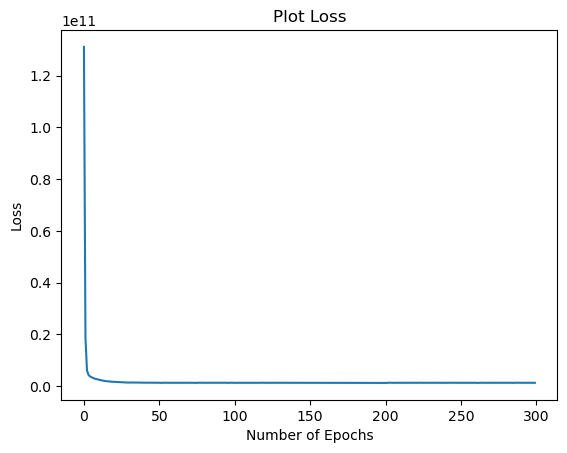

In [42]:
# Your code to plot epochs vs loss. Call the method.
plotLoss(train_loss, num_epochs)

Perform the predictions on X_tset. Call predict method.

In [43]:
# Your code to predict the profit i.e. y values
predict(theta_updated, X_test)

1036104.2061346531

# **Imortant - Lab Logbook requirement:**

# Please document the following in your lab logbook:

# 1. Plot the loss function.
# 2. Record the output of all the predictions on the test data; i.e., all the predicted y values.

# **Optional Part:**
# The rest of this notebook is Optional. It is recommended for you to complete it. However, if you have not marks would not be deducted.

# Fitting the model using sklearn and comparing with our model.

# Following piece of code is uncommented. Please comment it.

In [44]:
# Your code to import train_test_split from sklearn.model_selection
# Your code to import LinearRegression from sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [45]:
dataset_sk = pd.read_csv('50_Startups.csv')
X_sk = dataset_sk.iloc[:, :-1].values
y_sk = dataset_sk.iloc[:, 4].values

In [46]:
labelencoder_X_sk = LabelEncoder()
X_sk[:,3] = labelencoder_X_sk.fit_transform(X_sk[:,3])

onehotencoder = OneHotEncoder(handle_unknown='ignore')
X_sk_categorical = onehotencoder.fit_transform(X_sk[:,3].reshape(-1,1)).toarray()
X_sk = np.concatenate((X_sk,X_sk_categorical),axis=1)

In [47]:
X_sk = X_sk[:, [0,1,2,5,6]]

In [48]:
X_sk.shape


(50, 5)

In [49]:
# Your code to perform train test split with 20% data in the test set.
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
regressor_sk = LinearRegression()
regressor_sk.fit(X_train_sk, y_train_sk)

LinearRegression()

In [51]:

y_pred = regressor_sk.predict(X_test_sk)

In [52]:
X_train_sk.shape


(40, 6)

In [53]:
#Making the Prediction using Sklearn Regression
print(regressor_sk.predict([[160000,140000,5000000,1,0,0]]))

[[2.36620575e+10]]


In [54]:
#Making a Prediction
pred = predict(theta_updated,[160000,140000,5000000,1,0,1])
print(pred)

30748628416.013603
